# Import packages

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
import curve_curator
from curve_curator import models
curve_curator.__version__

'0.6.dev'

# Fit a model

In [4]:
# X data in nM (1e-9) is converted in log10 space 
x = np.log10([0.1, 1.0, 10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0]) - 9

# Y data is the observed response ratios 
y = pd.Series([1, 1, 4, 6, 7, 16, 55, 105, 147, 160])

# Define a logistic model with no parameter fixed.
logistic_model = models.LogisticModel()

# Fit the logistic model with ordinary least squares (ols).
# The main problem is that the optimization has no guarantee to find the best solution because there are many local minima.
# Only from some starting points, it is possible to reach the globally best fit. 
# Therefore, we need to pre-find the best best possible strating point, before the actual fitting is perfomed.
print('Before fitting:', logistic_model.get_all_parameters())
logistic_model.find_best_guess_ols(x, y)
logistic_model.fit_ols(x, y)
print('After fitting:', logistic_model.get_all_parameters())

# Optain the fitted parameters and calculate additional values such as "curve fold change" and "area under the curve"
curve_parameters = logistic_model.get_all_parameters()
curve_fold_change = logistic_model.calculate_fold_change(x)
area = logistic_model.calculate_auc(x)

# Evaluate the fitted model statistically
f_value, p_value = logistic_model.evaluate(x, y)
print('p-value:', p_value)

Before fitting: {'pec50': nan, 'slope': nan, 'front': nan, 'back': nan}
After fitting: {'pec50': 5.718987935452336, 'slope': 1.2158691909113435, 'front': 2.4340733745458163, 'back': 165.7142441876242}
p-value: 1.3748130638067389e-10


# Plot data

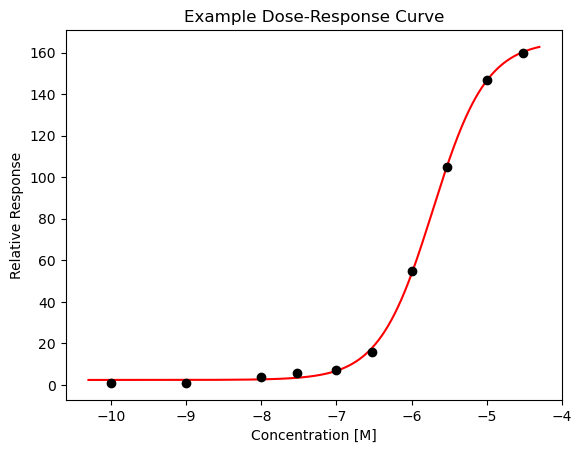

In [5]:
# Show the model using the predict function of the fitted model
line_x = np.linspace(-10.3, -4.3, 1000)
line_y = logistic_model.predict(line_x)

# Make it a nice looking plot
plt.plot(line_x, line_y, color='red', zorder=1)
plt.scatter(x, y, color='black', zorder=2)
plt.xlabel('Concentration [M]')
plt.ylabel('Relative Response')
plt.title('Example Dose-Response Curve')
plt.show()